<a href="https://colab.research.google.com/github/Pavith00/Stock-price-prediction-system/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-07-28,25.750000,25.850000,25.660000,25.750000,18.082300,44738700
1,2005-07-29,25.780001,26.000000,25.590000,25.610001,17.983978,59524400
2,2005-08-01,25.809999,26.049999,25.760000,25.920000,18.201666,61346800
3,2005-08-02,25.900000,26.900000,25.870001,26.809999,18.826647,137510100
4,2005-08-03,26.760000,27.430000,26.730000,27.250000,19.135618,139422400
...,...,...,...,...,...,...,...
4670,2024-02-16,407.959991,408.290009,403.440002,404.059998,404.059998,22281100
4671,2024-02-20,403.239990,404.489990,398.010010,402.790009,402.790009,24307900
4672,2024-02-21,400.170013,402.290009,397.220001,402.179993,402.179993,18631100
4673,2024-02-22,410.190002,412.829987,408.570007,411.649994,411.649994,27009900


In [4]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2005-07-28,25.750000
1,2005-07-29,25.610001
2,2005-08-01,25.920000
3,2005-08-02,26.809999
4,2005-08-03,27.250000
...,...,...
4670,2024-02-16,404.059998
4671,2024-02-20,402.790009
4672,2024-02-21,402.179993
4673,2024-02-22,411.649994


In [5]:
df['Date']

0       2005-07-28
1       2005-07-29
2       2005-08-01
3       2005-08-02
4       2005-08-03
           ...    
4670    2024-02-16
4671    2024-02-20
4672    2024-02-21
4673    2024-02-22
4674    2024-02-23
Name: Date, Length: 4675, dtype: object

In [7]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2005-07-28')
datetime_object

datetime.datetime(2005, 7, 28, 0, 0)

In [8]:
df

,Date,Close
0,2005-07-28,25.750000
1,2005-07-29,25.610001
2,2005-08-01,25.920000
3,2005-08-02,26.809999
4,2005-08-03,27.250000
...,...,...
4670,2024-02-16,404.059998
4671,2024-02-20,402.790009
4672,2024-02-21,402.179993
4673,2024-02-22,411.649994


In [9]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-9-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2005-07-28
1      2005-07-29
2      2005-08-01
3      2005-08-02
4      2005-08-03
          ...    
4670   2024-02-16
4671   2024-02-20
4672   2024-02-21
4673   2024-02-22
4674   2024-02-23
Name: Date, Length: 4675, dtype: datetime64[ns]

In [10]:
df.index = df.pop('Date')
df

,Close
Date,
2005-07-28,25.750000
2005-07-29,25.610001
2005-08-01,25.920000
2005-08-02,26.809999
2005-08-03,27.250000
...,...
2024-02-16,404.059998
2024-02-20,402.790009
2024-02-21,402.179993


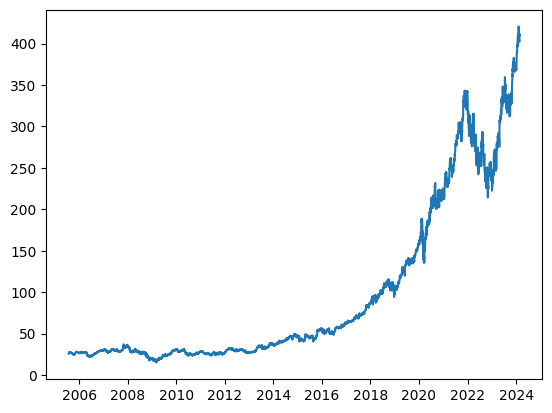

In [11]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [12]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [13]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

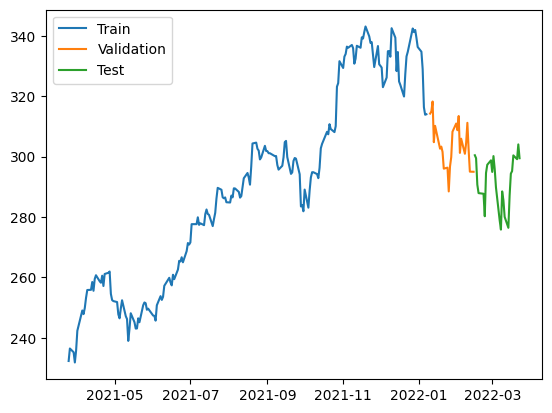

In [14]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 95ms/step - loss: 84562.3516 - mean_absolute_error: 289.0539 - val_loss: 92135.3516 - val_mean_absolute_error: 303.4508
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 84159.0469 - mean_absolute_error: 288.3533 - val_loss: 91738.7734 - val_mean_absolute_error: 302.7966
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 83779.6016 - mean_absolute_error: 287.6958 - val_loss: 91301.0703 - val_mean_absolute_error: 302.0730
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 83323.1172 - mean_absolute_error: 286.9033 - val_loss: 90770.4766 - val_mean_absolute_error: 301.1935
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 82757.2109 - mean_absolute_error: 285.9122 - val_loss: 90001.7891 - val_mean_absolute_error: 299.9146
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 81925.2188 - mean_absolute_error: 284.4528 - val_loss: 88975.3

7/7 [==============================] - 0s 3ms/step


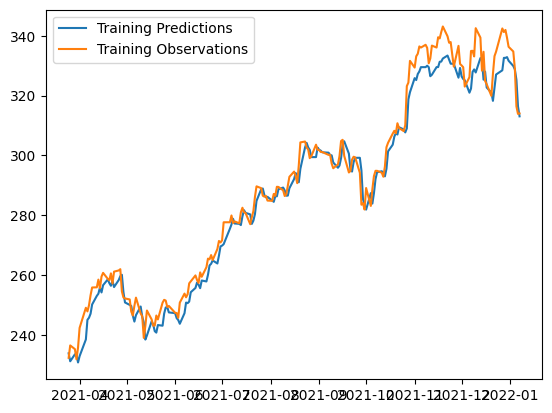

In [16]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 20ms/step


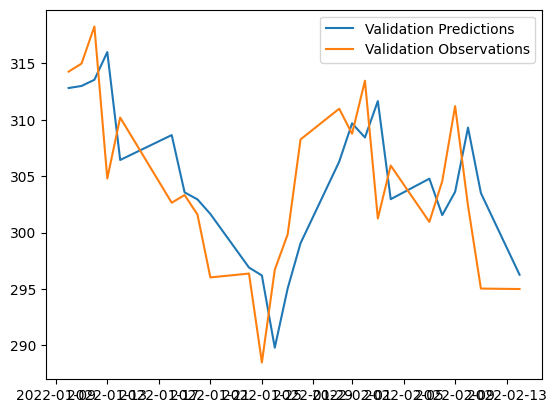

In [17]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 24ms/step


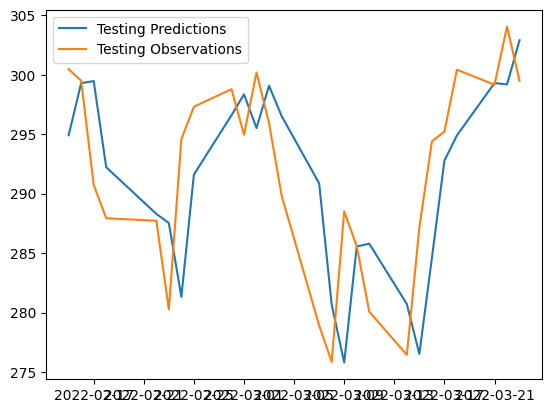

In [18]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

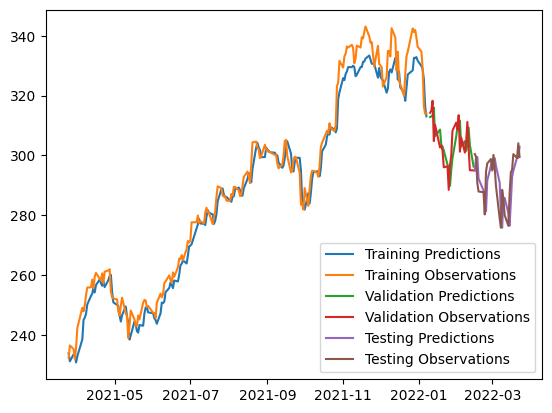

In [19]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [20]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 20ms/step


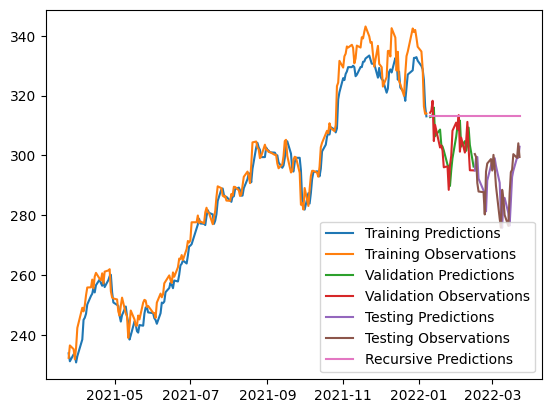

In [21]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])